In [1]:
## Plots

In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from scipy.stats import linregress


In [3]:
city_df = pd.read_csv('weather data/cities.csv')

In [4]:
city_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kuopio,FI,2023-01-24 22:51:48,62.8924,27.6770,31.95,93,100,9.22
1,1,Rikitea,PF,2023-01-24 22:51:48,-23.1203,-134.9692,79.61,75,3,16.82
2,2,Bathsheba,BB,2023-01-24 22:51:48,13.2167,-59.5167,79.41,65,20,19.57
3,3,Leh,IN,2023-01-24 22:51:48,34.1667,77.5833,12.85,94,100,1.70
4,4,Busselton,AU,2023-01-24 22:51:49,-33.6500,115.3333,60.17,75,0,13.09


In [5]:
#Pull data fields for plotting
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

In [6]:
# Get today's date in seconds
today = time.time()
today

1674752662.1523304

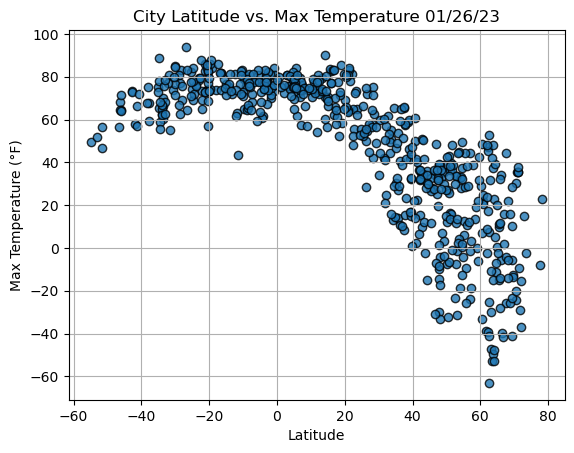

In [7]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather data/Fig1.png")

# Show plot.
plt.show()

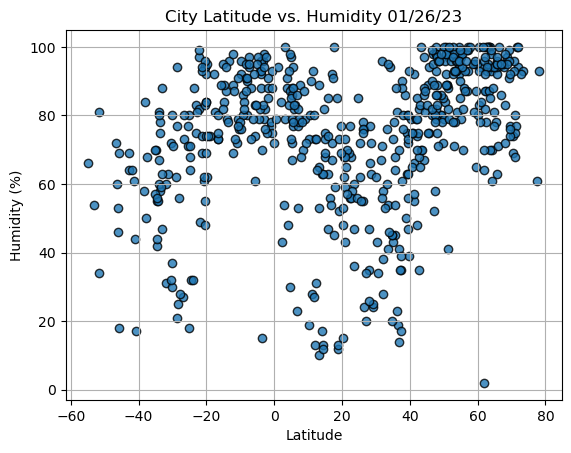

In [8]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather data/Fig2.png")

# Show plot.
plt.show()

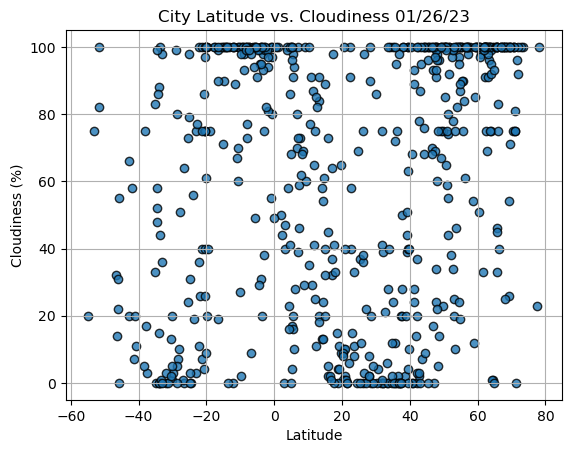

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather data/Fig3.png")

# Show plot.
plt.show()

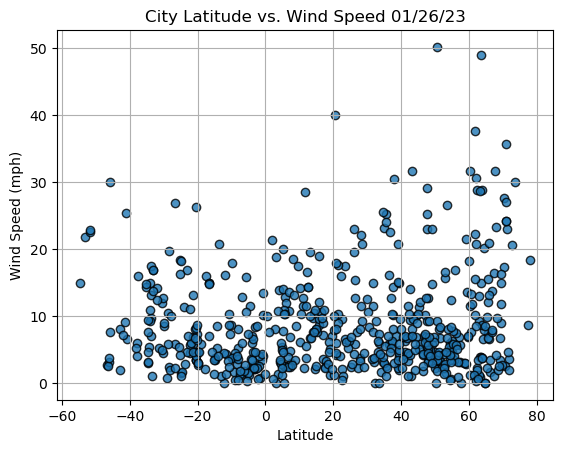

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather data/Fig4.png")

# Show plot.
plt.show()

In [13]:
#Create a function to perform linear regression
# and plot the regression line on scatter plot

def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    



In [14]:
index13 = city_df.loc[13]
index13

City_ID                        13
City                    Ugoofaaru
Country                        MV
Date          2023-01-24 22:51:51
Lat                        5.6667
Lng                          73.0
Max Temp                    79.72
Humidity                       77
Cloudiness                     98
Wind Speed                   12.8
Name: 13, dtype: object

In [15]:
city_df.loc[(city_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kuopio,FI,2023-01-24 22:51:48,62.8924,27.6770,31.95,93,100,9.22
2,2,Bathsheba,BB,2023-01-24 22:51:48,13.2167,-59.5167,79.41,65,20,19.57
3,3,Leh,IN,2023-01-24 22:51:48,34.1667,77.5833,12.85,94,100,1.70
5,5,Albany,US,2023-01-24 22:48:05,42.6001,-73.9662,34.88,82,78,9.46
7,7,Petropavlovsk-Kamchatskiy,RU,2023-01-24 22:47:55,53.0452,158.6483,-1.61,71,20,15.66


In [19]:
# Create N & S Hemisphere  dataframes
northern_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Lat"] < 0)]

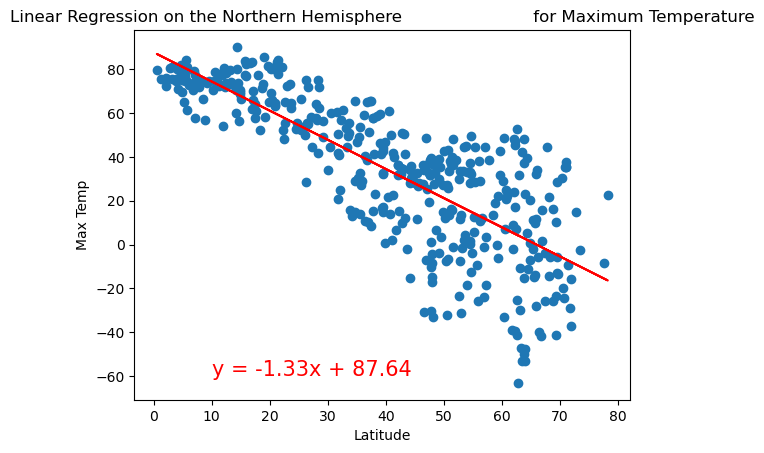

In [21]:
#Linear regression on North using our def function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-60))

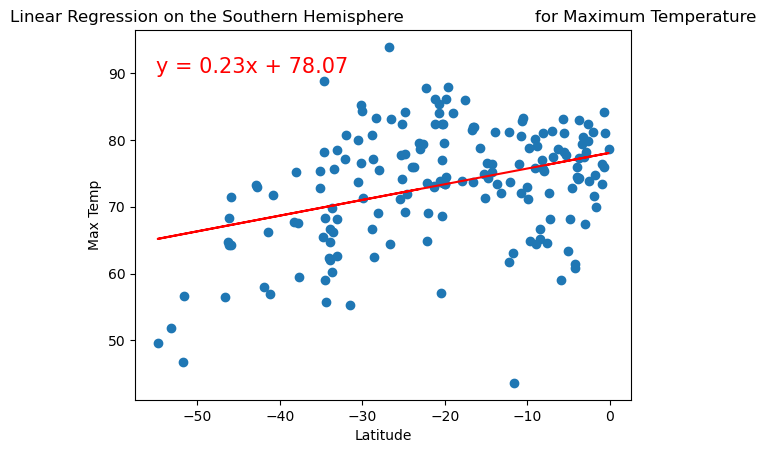

In [26]:
#Linear regression on South using our def function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

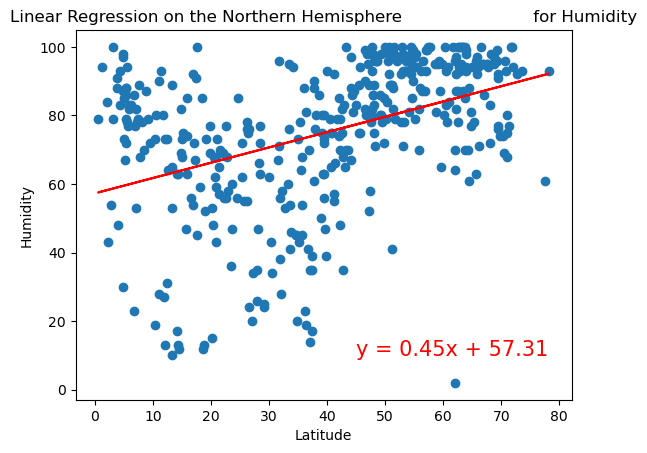

In [31]:
#Linear regression on North using our def function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(45,10))

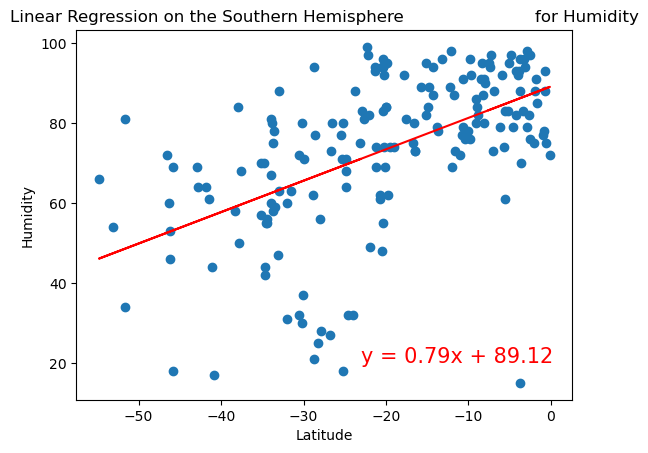

In [34]:
#Linear regression on South using our def function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Humidity',(-23,20))

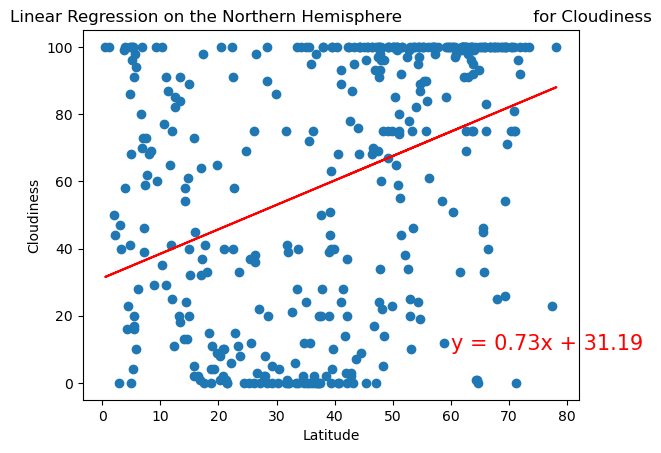

In [36]:
#Linear regression on North using our def function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(60,10))

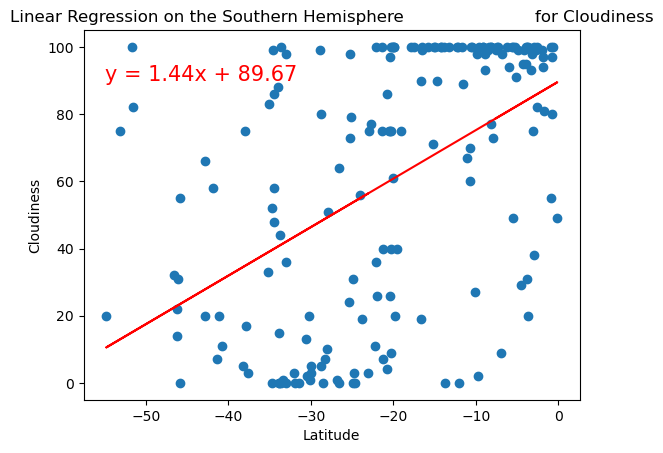

In [37]:
#Linear regression on South using our def function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-55,90))

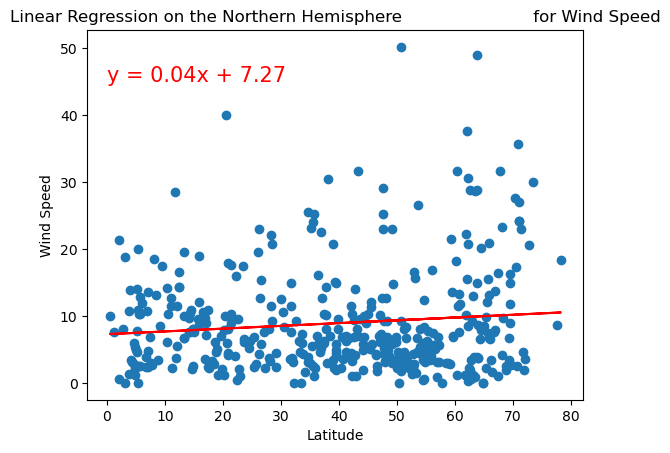

In [39]:
#Linear regression on North using our def function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,45))

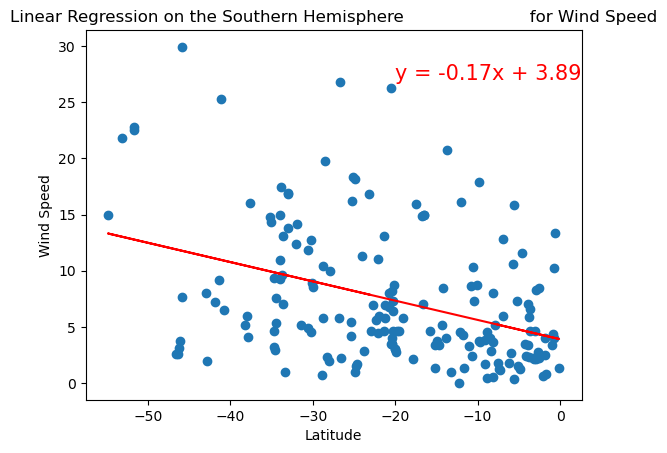

In [46]:
#Linear regression on South using our def function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Function call
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for Wind Speed', 'Wind Speed',(-20,27))